<a href="https://colab.research.google.com/github/karynkom/GoogleColab/blob/main/Homework4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Black-Friday-Sale Dataset

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
df = pd.read_csv('train.csv')
df.sample(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
115255,1005788,P00170442,M,26-35,0,A,4+,0,5,NaN,NaN,6884
435561,1001088,P00085142,F,0-17,10,A,3,0,5,13.0,14.0,6927
448392,1003080,P00123742,M,26-35,20,A,4+,1,11,NaN,NaN,6095
27273,1004161,P00241642,M,46-50,0,B,3,1,1,2.0,11.0,15853
522029,1002353,P00117642,F,36-45,9,C,3,1,10,16.0,NaN,23632


In [ ]:
df[df.isnull().any(axis=1)].shape[0]/df.shape[0] *100

69.67265865311198

In [ ]:
df.describe(include=['O'])

,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years
count,550068,550068,550068,550068,550068
unique,3631,2,7,3,5
top,P00265242,M,26-35,B,1
freq,1880,414259,219587,231173,193821


## Data Preparation

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [ ]:
df.drop('Product_ID', axis=1, inplace=True)

In [ ]:
df.isna().sum()

User_ID                            0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [ ]:
df1 = df.copy()
df1 = pd.get_dummies(df1, drop_first=True)

In [ ]:
df1['Product_Category_2_m'] = np.where(df1.Product_Category_2.isnull(), True, False)

In [ ]:
!pip install feature-engine

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 328.9/328.9 kB 6.0 MB/s eta 0:00:00


<Axes: title={'center': 'Category 3'}, ylabel='Frequency'>

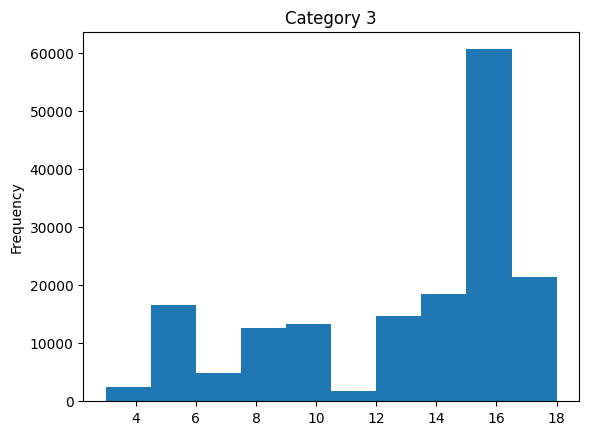

In [ ]:
df1['Product_Category_3'].plot(
    title='Category 3', kind='hist', xlabel='Categories'
)

<Axes: title={'center': 'Category 3 (Imputed)'}, ylabel='Frequency'>

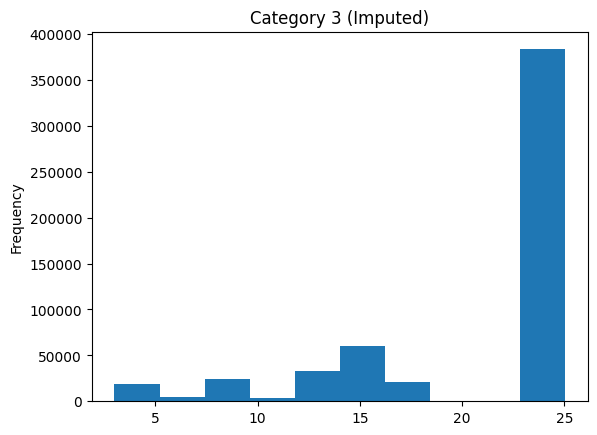

In [ ]:
from feature_engine.imputation import EndTailImputer

df1['Product_Category_3'] = EndTailImputer().fit_transform(df1[['Product_Category_3']])
df1['Product_Category_3'].plot(title='Category 3 (Imputed)', kind='hist', xlabel='Categories')

In [ ]:
df1.drop(['Product_Category_2'], axis=1, inplace=True)

In [ ]:
df1 = df1.astype('int64')

In [ ]:
df1.isnull().mean()

User_ID                          0.0
Occupation                       0.0
Marital_Status                   0.0
Product_Category_1               0.0
Product_Category_3               0.0
Purchase                         0.0
Gender_M                         0.0
Age_18-25                        0.0
Age_26-35                        0.0
Age_36-45                        0.0
Age_46-50                        0.0
Age_51-55                        0.0
Age_55+                          0.0
City_Category_B                  0.0
City_Category_C                  0.0
Stay_In_Current_City_Years_1     0.0
Stay_In_Current_City_Years_2     0.0
Stay_In_Current_City_Years_3     0.0
Stay_In_Current_City_Years_4+    0.0
Product_Category_2_m             0.0
dtype: float64

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 20 columns):
 #   Column                         Non-Null Count   Dtype
---  ------                         --------------   -----
 0   User_ID                        550068 non-null  int64
 1   Occupation                     550068 non-null  int64
 2   Marital_Status                 550068 non-null  int64
 3   Product_Category_1             550068 non-null  int64
 4   Product_Category_3             550068 non-null  int64
 5   Purchase                       550068 non-null  int64
 6   Gender_M                       550068 non-null  int64
 7   Age_18-25                      550068 non-null  int64
 8   Age_26-35                      550068 non-null  int64
 9   Age_36-45                      550068 non-null  int64
 10  Age_46-50                      550068 non-null  int64
 11  Age_51-55                      550068 non-null  int64
 12  Age_55+                        550068 non-null  int64
 13 

In [ ]:
import pandas as pd
import statsmodels.api as sm

# Extract the target variable and features
X = np.array(df1.iloc[:, :-2].join(df1.iloc[:, -1:]))
y = np.array(df1['Product_Category_2_m'])

# Add a constant to the features matrix
X_with_const = sm.add_constant(X)

# Fit logistic regression model
logit_model_stats = sm.Logit(y, X_with_const)
result = logit_model_stats.fit()

# Display the logistic regression results
print(result.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)


         Current function value: 0.000000
         Iterations: 35


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:               550068
Model:                          Logit   Df Residuals:                   550048
Method:                           MLE   Df Model:                           19
Date:                Sun, 10 Mar 2024   Pseudo R-squ.:                   1.000
Time:                        10:57:29   Log-Likelihood:              -0.037914
converged:                      False   LL-Null:                   -3.4300e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -14.3798   3029.097     -0.005      0.996   -5951.300    5922.541
x1         -8.432e-06      0.003     -0.003      0.998      -0.006       0.006
x2             0.0270      0.762      0.035      0.9

เนื่องจากไม่มีนัยสำคัญทางสถิติที่จะปฏิเสธสมมติฐานหลัก (การหายของข้อมูล Product_Category_2 เป็น MCAR) จึงทำการ impute Product_Category_2 ด้วยค่า mode

In [ ]:
df1 = df.copy()

<Axes: title={'center': 'Category 2'}, ylabel='Frequency'>

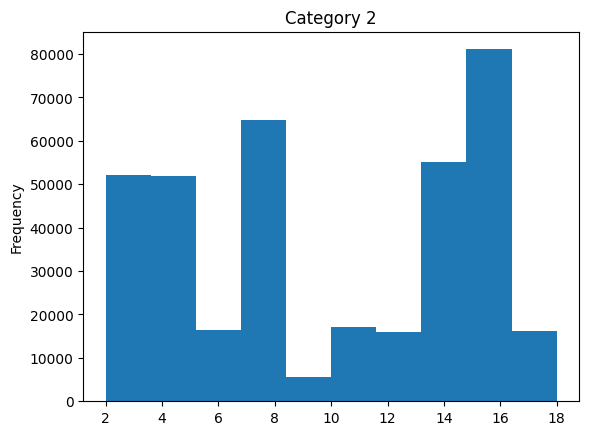

In [ ]:
df1['Product_Category_2'].plot(
    title='Category 2', kind='hist', xlabel='Categories'
)

<Axes: title={'center': 'Category 2 (Imputed)'}, ylabel='Frequency'>

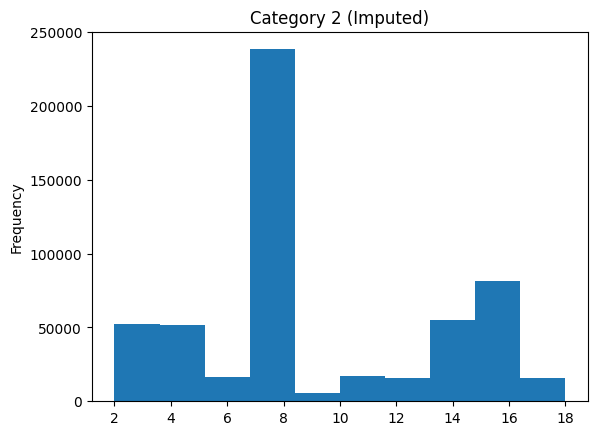

In [ ]:
from sklearn.impute import SimpleImputer
num_impute = SimpleImputer()
df1['Product_Category_2'] = SimpleImputer(strategy='most_frequent').fit_transform(df1[['Product_Category_2']])
df1['Product_Category_2'].plot(title='Category 2 (Imputed)', kind='hist', xlabel='Categories')

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Gender                      550068 non-null  object 
 2   Age                         550068 non-null  object 
 3   Occupation                  550068 non-null  int64  
 4   City_Category               550068 non-null  object 
 5   Stay_In_Current_City_Years  550068 non-null  object 
 6   Marital_Status              550068 non-null  int64  
 7   Product_Category_1          550068 non-null  int64  
 8   Product_Category_2          550068 non-null  float64
 9   Product_Category_3          166821 non-null  float64
 10  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 46.2+ MB


In [ ]:
df1 = pd.get_dummies(df1,drop_first=True)

In [ ]:
df1['Product_Category_3_m'] = np.where(df1.Product_Category_3.isnull(), True, False)

In [ ]:
df2 = df1.drop('Product_Category_3', axis=1)

In [ ]:
df2 = df2.astype('int64')

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 20 columns):
 #   Column                         Non-Null Count   Dtype
---  ------                         --------------   -----
 0   User_ID                        550068 non-null  int64
 1   Occupation                     550068 non-null  int64
 2   Marital_Status                 550068 non-null  int64
 3   Product_Category_1             550068 non-null  int64
 4   Product_Category_2             550068 non-null  int64
 5   Purchase                       550068 non-null  int64
 6   Gender_M                       550068 non-null  int64
 7   Age_18-25                      550068 non-null  int64
 8   Age_26-35                      550068 non-null  int64
 9   Age_36-45                      550068 non-null  int64
 10  Age_46-50                      550068 non-null  int64
 11  Age_51-55                      550068 non-null  int64
 12  Age_55+                        550068 non-null  int64
 13 

In [ ]:
import pandas as pd
import statsmodels.api as sm

# Extract the target variable and features
X = np.array(df2.iloc[:,:-1])

#X = np.array(df1.drop(['Product_Category_3', 'Product_Category_3_m'], axis=1))
y = np.array(df2['Product_Category_3_m'])

# Add a constant to the features matrix
X_with_const = sm.add_constant(X)

# Fit logistic regression model
logit_model_stats = sm.Logit(y, X_with_const)
result = logit_model_stats.fit()

# Display the logistic regression results
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.443736
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:               550068
Model:                          Logit   Df Residuals:                   550048
Method:                           MLE   Df Model:                           19
Date:                Sun, 10 Mar 2024   Pseudo R-squ.:                  0.2768
Time:                        10:57:39   Log-Likelihood:            -2.4408e+05
converged:                       True   LL-Null:                   -3.3753e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.1976      2.077      2.021      0.043       0.126       8.269
x1         -5.186e-06   2.07e

เนื่องจากมีนัยสำคัญทางสถิติที่จะปฏิเสธสมมติฐานหลัก (การหายของข้อมูล Product_Category_3 เป็น MCAR) จึงทำการ impute Product_Category_3 ด้วยค่า ItertiveImputer() (Assume ว่า การหายของข้อมูลไม่เป็น MNAR)

<Axes: title={'center': 'Category 3'}, ylabel='Frequency'>

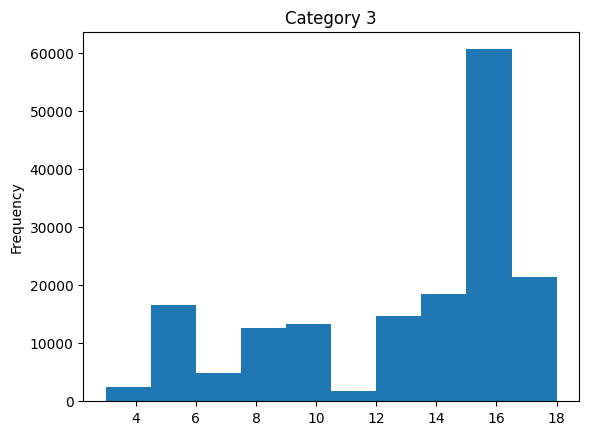

In [ ]:
df1['Product_Category_3'].plot(title='Category 3', kind='hist', xlabel='Categories')

In [ ]:
# multiple imputation
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import KNNImputer
from sklearn.impute import IterativeImputer

# Perform multiple imputation using IterativeImputer
imputer = IterativeImputer(max_iter=10, random_state=42)
imputed_data = imputer.fit_transform(df1.drop(['Product_Category_3_m'], axis=1))

# Create a new DataFrame with imputed values
df1 = pd.DataFrame(imputed_data, columns=df1.drop(['Product_Category_3_m'], axis=1).columns)

<Axes: title={'center': 'Category 3'}, ylabel='Frequency'>

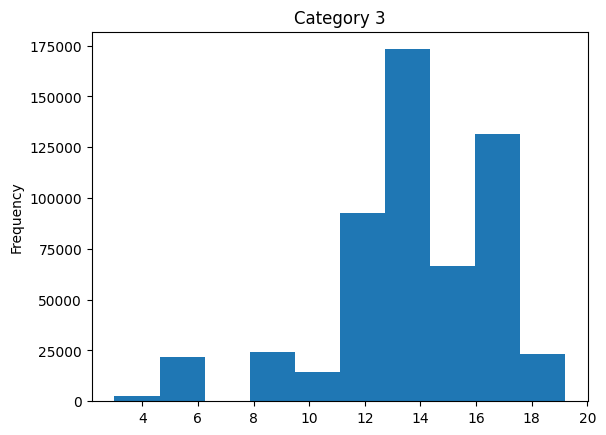

In [ ]:
df1['Product_Category_3'].plot(title='Category 3', kind='hist', xlabel='Categories')

In [ ]:
df1.isnull().mean()

User_ID                          0.0
Occupation                       0.0
Marital_Status                   0.0
Product_Category_1               0.0
Product_Category_2               0.0
Product_Category_3               0.0
Purchase                         0.0
Gender_M                         0.0
Age_18-25                        0.0
Age_26-35                        0.0
Age_36-45                        0.0
Age_46-50                        0.0
Age_51-55                        0.0
Age_55+                          0.0
City_Category_B                  0.0
City_Category_C                  0.0
Stay_In_Current_City_Years_1     0.0
Stay_In_Current_City_Years_2     0.0
Stay_In_Current_City_Years_3     0.0
Stay_In_Current_City_Years_4+    0.0
dtype: float64

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 20 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   User_ID                        550068 non-null  float64
 1   Occupation                     550068 non-null  float64
 2   Marital_Status                 550068 non-null  float64
 3   Product_Category_1             550068 non-null  float64
 4   Product_Category_2             550068 non-null  float64
 5   Product_Category_3             550068 non-null  float64
 6   Purchase                       550068 non-null  float64
 7   Gender_M                       550068 non-null  float64
 8   Age_18-25                      550068 non-null  float64
 9   Age_26-35                      550068 non-null  float64
 10  Age_36-45                      550068 non-null  float64
 11  Age_46-50                      550068 non-null  float64
 12  Age_51-55                     

In [ ]:
df1

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Gender_M,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,City_Category_B,City_Category_C,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+
0,1000001.0,10.0,0.0,3.0,8.0,12.485133,8370.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1000001.0,10.0,0.0,1.0,6.0,14.000000,15200.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1000001.0,10.0,0.0,12.0,8.0,11.736547,1422.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1000001.0,10.0,0.0,12.0,14.0,14.837159,1057.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1000002.0,16.0,0.0,8.0,8.0,13.118160,7969.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033.0,13.0,1.0,20.0,8.0,12.223001,368.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
550064,1006035.0,1.0,0.0,20.0,8.0,11.569580,371.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
550065,1006036.0,15.0,1.0,20.0,8.0,11.668050,137.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
550066,1006038.0,1.0,0.0,20.0,8.0,11.781855,365.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0


## Data Exploration

ใช้ DataFrame ตัวเดิมก่อนการ Imputation มาทำ EDA

Question: ตัวแปร Purchase มีการกระจายตัวของข้อมูลอย่างไร และมี Categorical Features ใดที่ส่งผลต่อค่าของ Purchase บ้าง?

In [ ]:
df

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,F,55+,1,C,2,0,20,NaN,NaN,365


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Gender                      550068 non-null  object 
 2   Age                         550068 non-null  object 
 3   Occupation                  550068 non-null  int64  
 4   City_Category               550068 non-null  object 
 5   Stay_In_Current_City_Years  550068 non-null  object 
 6   Marital_Status              550068 non-null  int64  
 7   Product_Category_1          550068 non-null  int64  
 8   Product_Category_2          376430 non-null  float64
 9   Product_Category_3          166821 non-null  float64
 10  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 46.2+ MB


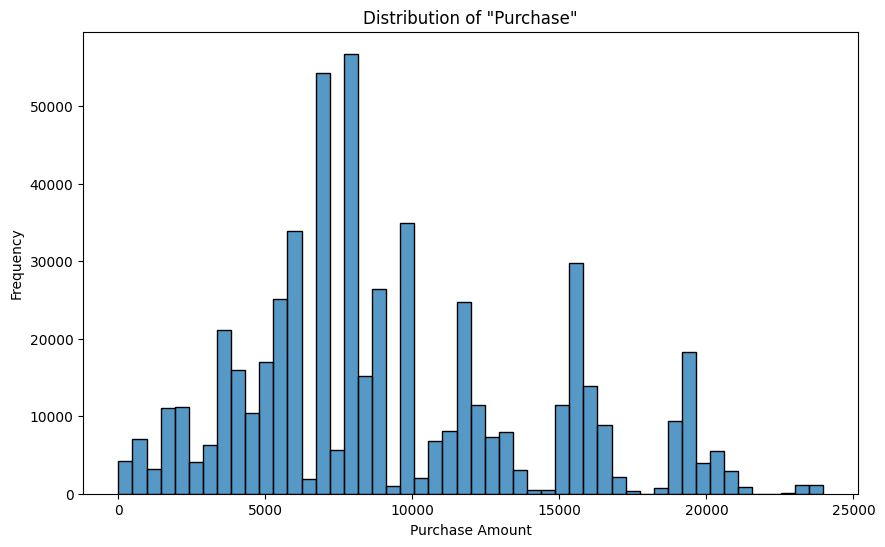

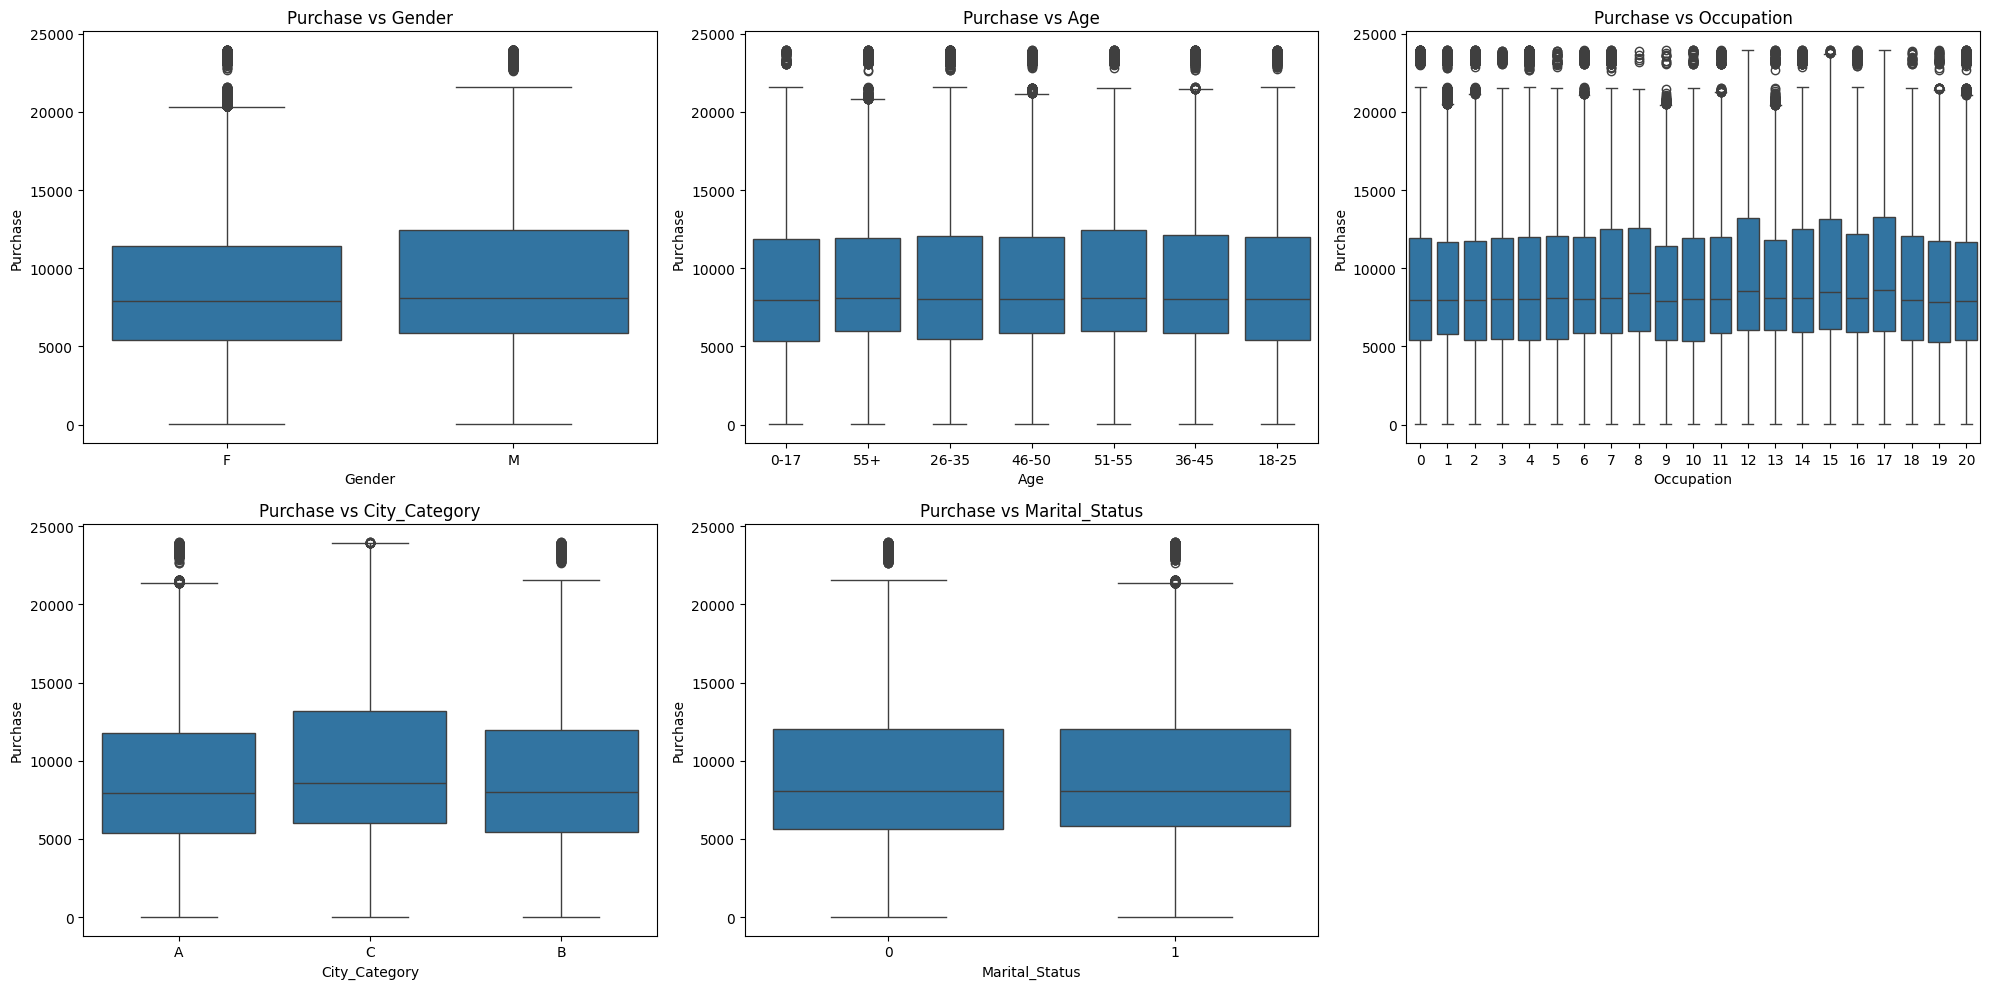

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['Purchase'], bins=50)
plt.title('Distribution of "Purchase"')
plt.xlabel('Purchase Amount')
plt.ylabel('Frequency')
plt.show()

categorical_columns = ['Gender', 'Age', 'Occupation', 'City_Category', 'Marital_Status']

plt.figure(figsize=(20, 10))
for i, column in enumerate(categorical_columns):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x=column, y='Purchase', data=df)
    plt.title(f'Purchase vs {column}')

plt.tight_layout()
plt.show()


###Key Insights form EDA
* จาก Histrogram ตัวแปร Purchase มีการกระจายตัวของข้อมูลเบ้ขวา แสดงให้เห็นว่าในช่วง Black Friday Sale จะมีจำนวนการทำธุรกรรมซื้อสินค้าจำนวนน้อย ๆ มากกว่าธุรกรรมที่ซื้อสินค้าจำนวนมาก ๆ
* จาก Boxplot แสดงให้ข้อมูลเชิงลึกที่น่าสนใจดังนี้

>1. ลูกค้าผู้ชายจะซื้อสินค้าปริมาณมากกว่าลูกค้าผู้หญิง

>2. เมือง C มีปริมาณการซื้อสินค้ามากกว่าเมือง A และ B

>3. มีบางอาชีพที่แสดงให้เห็นถึงปริมาณการซื้อสินค้าที่แตกต่างกัน

ในขณะที่การเปรียบเทียบตัวแปรอื่น ๆ ไม่ได้มีผลต่อปริมาณการซื้อสินค้ามากนัก

## Modelling

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 20 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   User_ID                        550068 non-null  float64
 1   Occupation                     550068 non-null  float64
 2   Marital_Status                 550068 non-null  float64
 3   Product_Category_1             550068 non-null  float64
 4   Product_Category_2             550068 non-null  float64
 5   Product_Category_3             550068 non-null  float64
 6   Purchase                       550068 non-null  float64
 7   Gender_M                       550068 non-null  float64
 8   Age_18-25                      550068 non-null  float64
 9   Age_26-35                      550068 non-null  float64
 10  Age_36-45                      550068 non-null  float64
 11  Age_46-50                      550068 non-null  float64
 12  Age_51-55                     

In [ ]:
df2 = df1.sample(frac=0.1, random_state=42)

In [ ]:
features = df2.drop('Purchase', axis=1)
data = features.to_numpy()
target = df2.iloc[:, 6].to_numpy()

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
X_train_val, X_test, y_train_val, y_test = train_test_split(data, target, test_size=0.15, shuffle=True, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.176474, shuffle=True, random_state=42)
print(f'train:val:test examples={X_train.shape[0]}:{X_val.shape[0]}:{X_test.shape[0]}')

m,n = X_train.shape
print(f'training examples:{m} features:{n}')

train:val:test examples=38503:8252:8252
training examples:38503 features:19


In [ ]:
# basline model
model = LinearRegression()
model.fit(X_train, y_train)
print(model.score(X_test, y_test))

0.12334851330898411


In [ ]:
print(df2['Purchase'].describe())

count    55007.000000
mean      9262.886923
std       5010.031283
min         12.000000
25%       5825.000000
50%       8046.000000
75%      12040.000000
max      23961.000000
Name: Purchase, dtype: float64


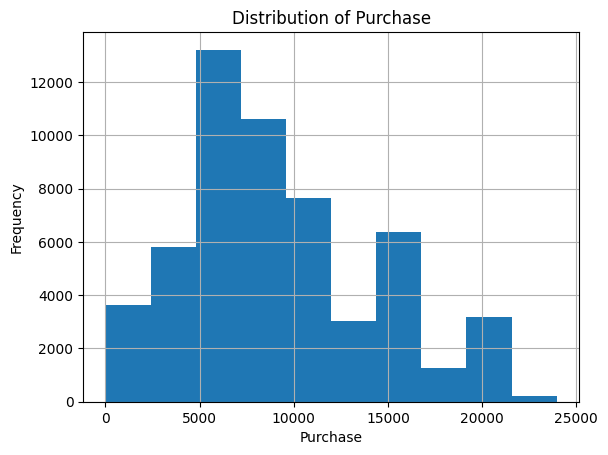

In [ ]:
df2['Purchase'].hist()
plt.xlabel('Purchase')
plt.ylabel('Frequency')
plt.title('Distribution of Purchase')
plt.show()

In [ ]:
# Instantiate and fit the model
rforest = RandomForestRegressor(n_estimators=100, random_state=42)
rforest.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
y_pred = rforest.predict(X_train)
mse_train = mean_squared_error(y_train, y_pred)
rmse_train = np.sqrt(mse_train)
print(f'Training Set Root Mean Squared Error: {rmse_train}')

y_pred = rforest.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred)
rmse_test = np.sqrt(mse_test)
print(f'Test Set Root Mean Squared Error: {rmse_test}')

Training Set Root Mean Squared Error: 950.711008211588
Test Set Root Mean Squared Error: 2361.232602166187


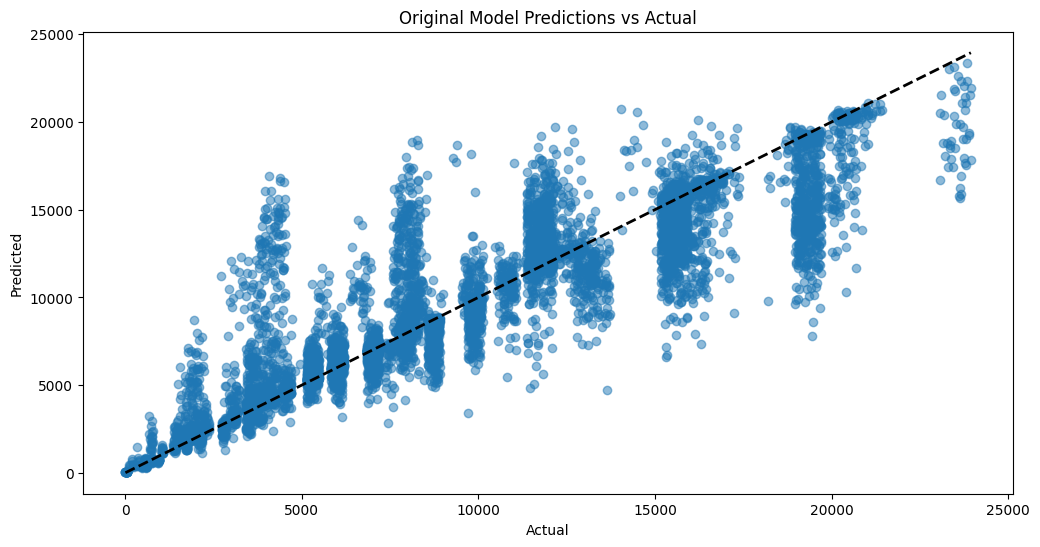

In [ ]:
plt.figure(figsize=(12, 6))

plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Original Model Predictions vs Actual')
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.show()

In [ ]:
# auto tuning
params_rf = {'n_estimators' : [50, 100, 200, 350, 500],
            'max_features' : ['auto','log2',None,'sqrt'],
            'min_samples_leaf' : [1, 2, 5, 10, 15, 25, 30],
            'min_samples_split' : [2, 5, 10],
            'max_depth': list(range(1, 11)) + [None]
            }

randomized_rf = RandomizedSearchCV(estimator=rforest,
                       param_distributions=params_rf,
                       cv=5,
                       verbose=1,
                       n_jobs=-1)

randomized_rf.fit(X_train_val, y_train_val)

print("Best Parameters:", randomized_rf.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


Best Parameters: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': None}


In [ ]:
best_rf_model = randomized_rf.best_estimator_
best_rf_model.fit(X_train, y_train)

y_pred = best_rf_model.predict(X_train)

mse_train = mean_squared_error(y_train, y_pred)
rmse_train = np.sqrt(mse_train)
print(f'Training Set Root Mean Squared Error: {rmse_train}')

y_pred = best_rf_model.predict(X_test)

rmse_test = np.sqrt(mean_squared_error(y_pred, y_test))
print(f'Test Set Root Mean Squared Error: {rmse_test}')

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


Training Set Root Mean Squared Error: 1480.8698865345698
Test Set Root Mean Squared Error: 2336.95925951955


In [ ]:
pred = best_rf_model.predict(X_test[-1].reshape(1, -1))[0]

print(f'Prediction: {pred:.2f}')
print(f'Ground truth: {y_test[-1]:.2f}')

Prediction: 7217.16
Ground truth: 6997.00


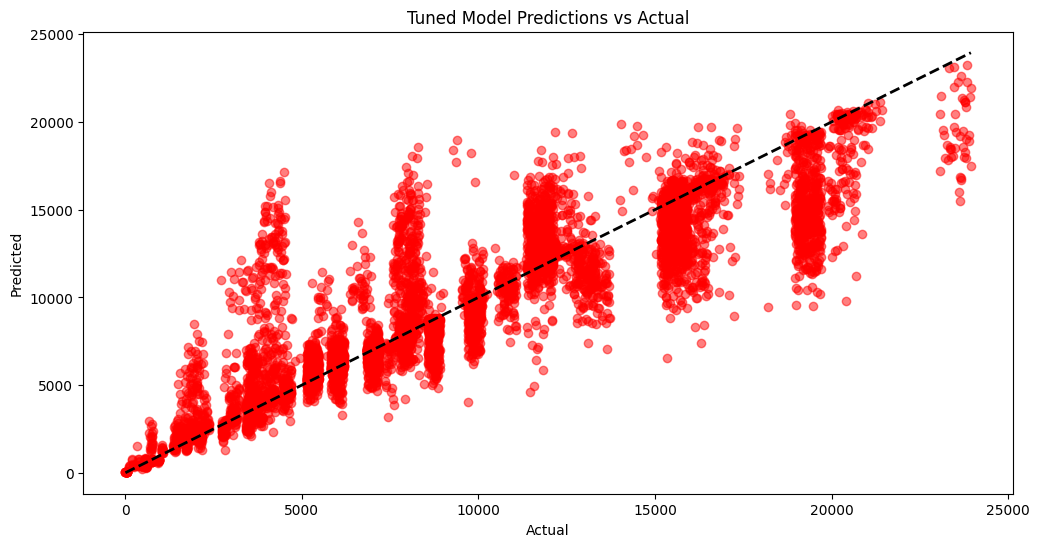

In [ ]:
plt.figure(figsize=(12, 6))

plt.scatter(y_test, y_pred, alpha=0.5, color='r')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Tuned Model Predictions vs Actual')
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.show()

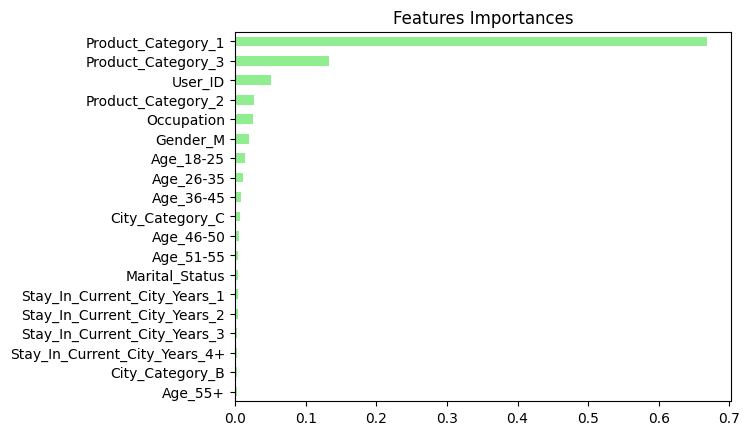

In [ ]:
importances = best_rf_model.feature_importances_

importances = pd.Series(data=best_rf_model.feature_importances_,
                        index= df2.drop('Purchase', axis=1).columns)

importances_sorted = importances.sort_values()

importances_sorted.plot(kind='barh', color='lightgreen')
plt.title('Features Importances')
plt.show()